In [1]:
from NeuralNetworkModel import NeuralNetwork

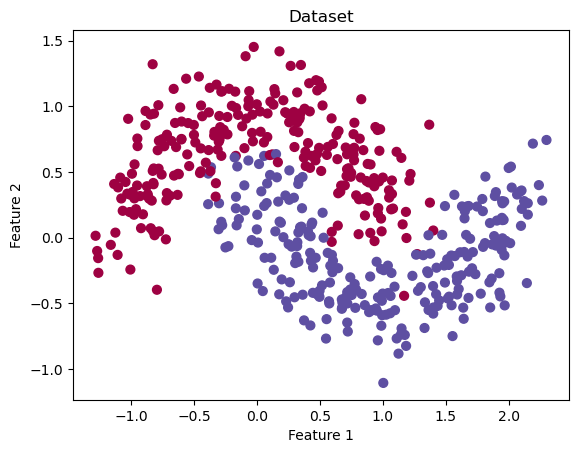

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate a dataset with two interleaving half circles
X, Y = make_moons(n_samples=500, noise=0.2, random_state=0)
Y = Y.reshape((1, Y.shape[0]))  # reshape Y to (1, m)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.title("Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [23]:
X_T = X.T

model_sig = NeuralNetwork()
model_sig.add(64,"relu")
model_sig.add(64,"relu")
model_sig.add(64,"relu")
model_sig.add(1,"sigmoid")
model_sig.compile(X_T)

epochs_sig = 80

history_sig = model_sig.fit(X_T,Y,epochs=epochs_sig,learning_rate=0.001,optimizer='adam')

Epochs : 0 , loss = 0.37687
Epochs : 10 , loss = 0.27752
Epochs : 20 , loss = 0.24136
Epochs : 30 , loss = 0.17145
Epochs : 40 , loss = 0.08697
Epochs : 50 , loss = 0.04811
Epochs : 60 , loss = 0.02087
Epochs : 70 , loss = 0.01175


Text(0.5, 1.0, 'Loss')

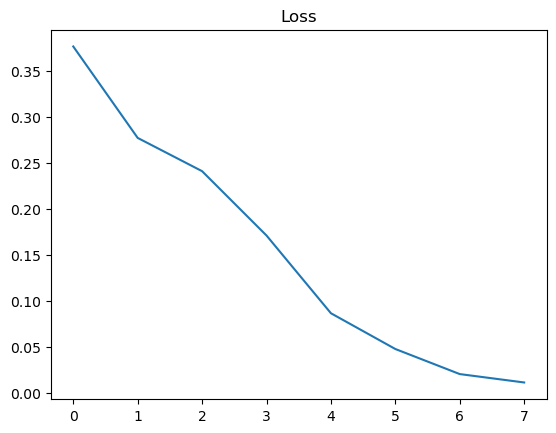

In [24]:
epochs_range_sig = range(epochs_sig//10)

plt.plot(epochs_range_sig,history_sig['loss'],label='Loss')
plt.title("Loss")

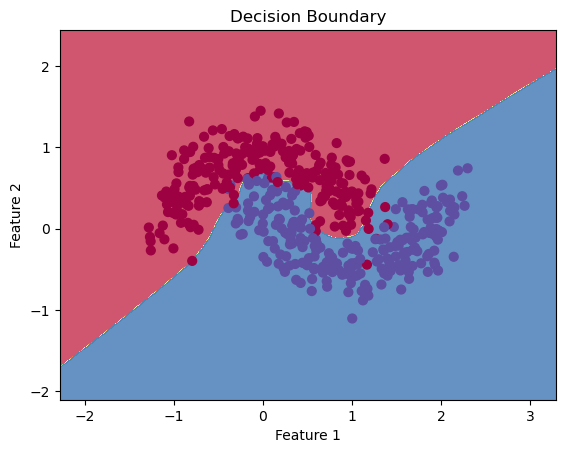

In [25]:
def plot_decision_boundary(model, X, Y):
    # Set min and max values and give some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.01
    
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y.ravel(), s=40, cmap=plt.cm.Spectral)
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(lambda x: model_sig.predict(x), X, Y)